In [141]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [142]:
file_name = "train-chennai-sale.csv"
df_original = pd.read_csv(file_name)
df_original.head()

PRT_ID        AREA  INT_SQFT   DATE_SALE  DIST_MAINROAD  N_BEDROOM  \
0  P03210  Karapakkam      1004  04-05-2011            131        1.0   
1  P09411  Anna Nagar      1986  19-12-2006             26        2.0   
2  P01812       Adyar       909  04-02-2012             70        1.0   
3  P05346   Velachery      1855  13-03-2010             14        3.0   
4  P06210  Karapakkam      1226  05-10-2009             84        1.0   

   N_BATHROOM  N_ROOM SALE_COND PARK_FACIL  ... UTILITY_AVAIL  STREET MZZONE  \
0         1.0       3  AbNormal        Yes  ...        AllPub   Paved      A   
1         1.0       5  AbNormal         No  ...        AllPub  Gravel     RH   
2         1.0       3  AbNormal        Yes  ...           ELO  Gravel     RL   
3         2.0       5    Family         No  ...       NoSewr    Paved      I   
4         1.0       3  AbNormal        Yes  ...        AllPub  Gravel      C   

  QS_ROOMS QS_BATHROOM  QS_BEDROOM  QS_OVERALL  REG_FEE  COMMIS  SALES_PRICE  
0      4.0         3.9         4.9       4.330   380000  144400      7600000  
1      4.9         4.2         2.5       3.765   760122  304049     21717770  
2      4.1         3.8         2.2       3.090   421094   92114     13159200  
3      4.7         3.9         3.6       4.010   356321   77042      9630290  
4      3.0         2.5         4.1       3.290   237000   74063      7406250  

[5 rows x 22 columns]

In [143]:
#copy the original df into a variable df
df = df_original.copy(deep = True)

In [144]:
df.shape

(7109, 22)

In [145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PRT_ID         7109 non-null   object 
 1   AREA           7109 non-null   object 
 2   INT_SQFT       7109 non-null   int64  
 3   DATE_SALE      7109 non-null   object 
 4   DIST_MAINROAD  7109 non-null   int64  
 5   N_BEDROOM      7108 non-null   float64
 6   N_BATHROOM     7104 non-null   float64
 7   N_ROOM         7109 non-null   int64  
 8   SALE_COND      7109 non-null   object 
 9   PARK_FACIL     7109 non-null   object 
 10  DATE_BUILD     7109 non-null   object 
 11  BUILDTYPE      7109 non-null   object 
 12  UTILITY_AVAIL  7109 non-null   object 
 13  STREET         7109 non-null   object 
 14  MZZONE         7109 non-null   object 
 15  QS_ROOMS       7109 non-null   float64
 16  QS_BATHROOM    7109 non-null   float64
 17  QS_BEDROOM     7109 non-null   float64
 18  QS_OVERA

In [146]:
df.isna().sum()

PRT_ID            0
AREA              0
INT_SQFT          0
DATE_SALE         0
DIST_MAINROAD     0
N_BEDROOM         1
N_BATHROOM        5
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
DATE_BUILD        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
REG_FEE           0
COMMIS            0
SALES_PRICE       0
dtype: int64

QS_OVERALL is having 48 missing values which is highest, first lets try to solve this missing values,
From viewing the data it seems that QS_OVERALL seems to be an average of [QS_ROOMS, QS_BATHROOM,QS_BEDROOM]
Let us verify this hypothesis

In [147]:
temp_df = df[['QS_ROOMS','QS_BATHROOM','QS_BEDROOM','QS_OVERALL']].dropna()
temp_df

QS_ROOMS  QS_BATHROOM  QS_BEDROOM  QS_OVERALL
0          4.0          3.9         4.9       4.330
1          4.9          4.2         2.5       3.765
2          4.1          3.8         2.2       3.090
3          4.7          3.9         3.6       4.010
4          3.0          2.5         4.1       3.290
...        ...          ...         ...         ...
7104       3.0          2.2         2.4       2.520
7105       3.6          4.5         3.3       3.920
7106       4.3          4.2         2.9       3.840
7107       4.6          3.8         4.1       4.160
7108       3.1          3.5         4.3       3.640

[7061 rows x 4 columns]

In [148]:
mean_df = df[['QS_BEDROOM','QS_BATHROOM','QS_ROOMS']].mean(axis = 1).round(2)
error =(  temp_df['QS_OVERALL'] - mean_df)/ temp_df['QS_OVERALL']


<AxesSubplot:ylabel='Count'>

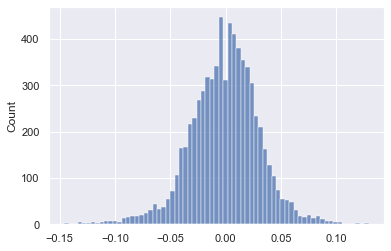

In [149]:
sns.histplot(error)

In [150]:
correlation =  temp_df['QS_OVERALL'].corr(mean_df)
correlation,abs(error).mean()

(0.9789567977306202, 0.02393408391764116)

From above we know that correlation is almost 1 mean error within 2.5% we can safely assume that our hypothesis is correct and the error is probably from rounding off before data entry.
Hence we can safely calculate the missing  "QS_OVERALL" by finding the mean of other 3 features

In [151]:
#Fill missing "QS_OVERALL" with mean of ["QS_ROOMS", "QS_BATHROOM","QS_BEDROOM"]
temp_df = df[['QS_BEDROOM','QS_BATHROOM','QS_ROOMS']].mean(axis = 1).round(2).rename('QS_OVERALL')
df['QS_OVERALL'].fillna(temp_df,inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PRT_ID         7109 non-null   object 
 1   AREA           7109 non-null   object 
 2   INT_SQFT       7109 non-null   int64  
 3   DATE_SALE      7109 non-null   object 
 4   DIST_MAINROAD  7109 non-null   int64  
 5   N_BEDROOM      7108 non-null   float64
 6   N_BATHROOM     7104 non-null   float64
 7   N_ROOM         7109 non-null   int64  
 8   SALE_COND      7109 non-null   object 
 9   PARK_FACIL     7109 non-null   object 
 10  DATE_BUILD     7109 non-null   object 
 11  BUILDTYPE      7109 non-null   object 
 12  UTILITY_AVAIL  7109 non-null   object 
 13  STREET         7109 non-null   object 
 14  MZZONE         7109 non-null   object 
 15  QS_ROOMS       7109 non-null   float64
 16  QS_BATHROOM    7109 non-null   float64
 17  QS_BEDROOM     7109 non-null   float64
 18  QS_OVERA

In [152]:
missing_rows = df.isna().sum(axis = 1).sum()
missing_rows,missing_rows/df.shape[0]

(6, 0.0008440005626670418)

The rows with remaining missing data are very low 6 no's, lesser than 0.1%. Hence we can drop those rows

In [153]:
df.dropna(inplace = True)
df.reset_index(inplace = True,drop = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7103 entries, 0 to 7102
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PRT_ID         7103 non-null   object 
 1   AREA           7103 non-null   object 
 2   INT_SQFT       7103 non-null   int64  
 3   DATE_SALE      7103 non-null   object 
 4   DIST_MAINROAD  7103 non-null   int64  
 5   N_BEDROOM      7103 non-null   float64
 6   N_BATHROOM     7103 non-null   float64
 7   N_ROOM         7103 non-null   int64  
 8   SALE_COND      7103 non-null   object 
 9   PARK_FACIL     7103 non-null   object 
 10  DATE_BUILD     7103 non-null   object 
 11  BUILDTYPE      7103 non-null   object 
 12  UTILITY_AVAIL  7103 non-null   object 
 13  STREET         7103 non-null   object 
 14  MZZONE         7103 non-null   object 
 15  QS_ROOMS       7103 non-null   float64
 16  QS_BATHROOM    7103 non-null   float64
 17  QS_BEDROOM     7103 non-null   float64
 18  QS_OVERA

Checking Object columns for datatype/data format

In [154]:
df.select_dtypes(include = 'object').head()

PRT_ID        AREA   DATE_SALE SALE_COND PARK_FACIL  DATE_BUILD  \
0  P03210  Karapakkam  04-05-2011  AbNormal        Yes  15-05-1967   
1  P09411  Anna Nagar  19-12-2006  AbNormal         No  22-12-1995   
2  P01812       Adyar  04-02-2012  AbNormal        Yes  09-02-1992   
3  P05346   Velachery  13-03-2010    Family         No  18-03-1988   
4  P06210  Karapakkam  05-10-2009  AbNormal        Yes  13-10-1979   

    BUILDTYPE UTILITY_AVAIL  STREET MZZONE  
0  Commercial        AllPub   Paved      A  
1  Commercial        AllPub  Gravel     RH  
2  Commercial           ELO  Gravel     RL  
3      Others       NoSewr    Paved      I  
4      Others        AllPub  Gravel      C

Checking redundant columns:

In [155]:
#_Removing columns [PRT_ID, REGFEE, COMMIS]
to_drop = ["PRT_ID", "REG_FEE", "COMMIS"]
df.drop(to_drop,axis = 1,inplace = True)

In [156]:
df.columns

Index(['AREA', 'INT_SQFT', 'DATE_SALE', 'DIST_MAINROAD', 'N_BEDROOM',
       'N_BATHROOM', 'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'DATE_BUILD',
       'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE', 'QS_ROOMS',
       'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL', 'SALES_PRICE'],
      dtype='object')

In [157]:
df.select_dtypes(include = 'object').columns

Index(['AREA', 'DATE_SALE', 'SALE_COND', 'PARK_FACIL', 'DATE_BUILD',
       'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE'],
      dtype='object')

In [158]:
df.DATE_BUILD = df.DATE_BUILD.astype('str')
df.DATE_SALE = df.DATE_SALE.astype('str')

In [159]:
# changing date_features into date_datatypes from object
df.DATE_SALE = pd.to_datetime(df.DATE_SALE.str.strip(), format = '%d-%m-%Y')
df.DATE_BUILD = pd.to_datetime(df.DATE_BUILD.str.strip(),format = '%d-%m-%Y')

In [160]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7103 entries, 0 to 7102
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   AREA           7103 non-null   object        
 1   INT_SQFT       7103 non-null   int64         
 2   DATE_SALE      7103 non-null   datetime64[ns]
 3   DIST_MAINROAD  7103 non-null   int64         
 4   N_BEDROOM      7103 non-null   float64       
 5   N_BATHROOM     7103 non-null   float64       
 6   N_ROOM         7103 non-null   int64         
 7   SALE_COND      7103 non-null   object        
 8   PARK_FACIL     7103 non-null   object        
 9   DATE_BUILD     7103 non-null   datetime64[ns]
 10  BUILDTYPE      7103 non-null   object        
 11  UTILITY_AVAIL  7103 non-null   object        
 12  STREET         7103 non-null   object        
 13  MZZONE         7103 non-null   object        
 14  QS_ROOMS       7103 non-null   float64       
 15  QS_BATHROOM    7103 n

In [161]:
#change N_BEDROOM AND N_BATHROOM into int datatype
df.N_BEDROOM   = df.N_BEDROOM.astype(int)
df.N_BATHROOM   = df.N_BATHROOM.astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7103 entries, 0 to 7102
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   AREA           7103 non-null   object        
 1   INT_SQFT       7103 non-null   int64         
 2   DATE_SALE      7103 non-null   datetime64[ns]
 3   DIST_MAINROAD  7103 non-null   int64         
 4   N_BEDROOM      7103 non-null   int32         
 5   N_BATHROOM     7103 non-null   int32         
 6   N_ROOM         7103 non-null   int64         
 7   SALE_COND      7103 non-null   object        
 8   PARK_FACIL     7103 non-null   object        
 9   DATE_BUILD     7103 non-null   datetime64[ns]
 10  BUILDTYPE      7103 non-null   object        
 11  UTILITY_AVAIL  7103 non-null   object        
 12  STREET         7103 non-null   object        
 13  MZZONE         7103 non-null   object        
 14  QS_ROOMS       7103 non-null   float64       
 15  QS_BATHROOM    7103 n

#### check for spelling mismatch in object columns

In [162]:
obj_columns = df.select_dtypes(include = 'object').columns
for i in obj_columns:
    print('\033[1m'+  i + '\033[0m')
    print(df[i].value_counts())
    

AREA
Chrompet      1679
Karapakkam    1363
KK Nagar       996
Velachery      979
Anna Nagar     780
Adyar          773
T Nagar        496
Chrompt          9
Chrmpet          6
TNagar           5
Chormpet         5
Karapakam        3
Ana Nagar        3
Velchery         2
Ann Nagar        2
Adyr             1
KKNagar          1
Name: AREA, dtype: int64
SALE_COND
AdjLand        1433
Partial        1427
Normal Sale    1422
AbNormal       1405
Family         1402
Adj Land          6
Ab Normal         5
Partiall          2
PartiaLl          1
Name: SALE_COND, dtype: int64
PARK_FACIL
Yes    3584
No     3517
Noo       2
Name: PARK_FACIL, dtype: int64
BUILDTYPE
House         2443
Commercial    2325
Others        2305
Other           26
Comercial        4
Name: BUILDTYPE, dtype: int64
UTILITY_AVAIL
AllPub     1885
NoSeWa     1870
NoSewr     1826
ELO        1521
All Pub       1
Name: UTILITY_AVAIL, dtype: int64
STREET
Paved        2558
Gravel       2518
No Access    2008
Pavd           12
NoAcces

> We have a few spelling variations <br>
> eg: 'Anna Nagar' vs 'Ana Nagar' , 'Partial' vs 'PartiaLl', etc. 

#### we are going to get rid of this spelling mistakes by Series.replace({'wrong string':'wright string'})

In [163]:

# Renaming all the column names in lowercase letters
df.columns = df.columns.str.lower()


# Renaming all the string in area column names in lowercase letters
df.area = df.area.str.lower()

# Correcting the spelling mistakes in area columns
df.area = df.area.replace({'velchery':'velachery', 
                       'kknagar':'kk nagar', 
                       'tnagar':'t nagar', 
                       'chormpet':'chrompet', 
                       'chrompt':'chrompet', 
                       'chrmpet':'chrompet', 
                       'ana nagar':'anna nagar', 
                       'ann nagar':'anna nagar',
                       'karapakam':'karapakkam', 
                       'adyr':'adyar'})


# Renaming all the string in sale_cond column names in lowercase letters
df.sale_cond = df.sale_cond.str.lower()

# Correcting the spelling mistakes in sale_cond columns
df.sale_cond = df.sale_cond.replace({'adj land':'adjland', 
                       'normal sale':'normal sale',
                       'partiall':'partial',
                       'ab normal':'abnormal'})


# Renaming all the string in park_facil column names in lowercase letters
df.park_facil = df.park_facil.str.lower()

# Correcting the spelling mistakes in park_facil columns
df.park_facil = df.park_facil.replace({'noo':'no'})


# Renaming all the string in buildtype column names in lowercase letters
df.buildtype = df.buildtype.str.lower()

# Correcting the spelling mistakes in buildtype columns
df.buildtype = df.buildtype.replace({'comercial':'commercial', 
                       'others':'other'})


# Renaming all the string in utility_avail column names in lowercase letters
df.utility_avail = df.utility_avail.str.lower()

# Correcting the spelling mistakes in utility_avail columns
df.utility_avail = df.utility_avail.replace({'all pub':'allpub',
                                             'nosewr':'nosewa'})
                                            
                                            
# Renaming all the string in street column names in lowercase letters
df.street = df.street.str.lower()

# Correcting the spelling mistakes in street columns
df.street = df.street.replace({'pavd':'paved', 
                       'noaccess':'no access'})


# Renaming all the string in mzzone column names in lowercase letters
df.mzzone = df.mzzone.str.lower()



df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7103 entries, 0 to 7102
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   area           7103 non-null   object        
 1   int_sqft       7103 non-null   int64         
 2   date_sale      7103 non-null   datetime64[ns]
 3   dist_mainroad  7103 non-null   int64         
 4   n_bedroom      7103 non-null   int32         
 5   n_bathroom     7103 non-null   int32         
 6   n_room         7103 non-null   int64         
 7   sale_cond      7103 non-null   object        
 8   park_facil     7103 non-null   object        
 9   date_build     7103 non-null   datetime64[ns]
 10  buildtype      7103 non-null   object        
 11  utility_avail  7103 non-null   object        
 12  street         7103 non-null   object        
 13  mzzone         7103 non-null   object        
 14  qs_rooms       7103 non-null   float64       
 15  qs_bathroom    7103 n

In [164]:
#checking if we have done replacing correctly!
obj_columns = df.select_dtypes(include = 'object').columns
for i in obj_columns:
    print('\033[1m'+  i + '\033[0m')
    print(df[i].value_counts())
    

area
chrompet      1699
karapakkam    1366
kk nagar       997
velachery      981
anna nagar     785
adyar          774
t nagar        501
Name: area, dtype: int64
sale_cond
adjland        1439
partial        1430
normal sale    1422
abnormal       1410
family         1402
Name: sale_cond, dtype: int64
park_facil
yes    3584
no     3519
Name: park_facil, dtype: int64
buildtype
house         2443
other         2331
commercial    2329
Name: buildtype, dtype: int64
utility_avail
allpub     1886
nosewa     1870
nosewr     1826
elo        1521
Name: utility_avail, dtype: int64
street
paved        2570
gravel       2518
no access    2015
Name: street, dtype: int64
mzzone
rl    1856
rh    1822
rm    1813
c      550
a      537
i      525
Name: mzzone, dtype: int64


In [165]:
#Renaming all the column names in uppercase letters!
df.columns = df.columns.str.upper()

>  OUTLIER DETECTION 

In [166]:
def outlierdetector(series : pd.Series):
    z_score = (series - series.mean())/series.std()
    return series[z_score > 3].to_list()

In [167]:
num_columns = df.select_dtypes(include = ['int','float']).columns.to_list()
for i in num_columns:
    print('outliers in',i,':')
    print(outlierdetector(df[i]))

outliers in INT_SQFT :
[]
outliers in DIST_MAINROAD :
[]
outliers in N_BEDROOM :
[]
outliers in N_BATHROOM :
[]
outliers in N_ROOM :
[]
outliers in QS_ROOMS :
[]
outliers in QS_BATHROOM :
[]
outliers in QS_BEDROOM :
[]
outliers in QS_OVERALL :
[]
outliers in SALES_PRICE :
[23307000, 22630540, 22829130, 22449450, 22744800, 23667340, 22348850, 22567050, 22916500, 22302670, 22499190, 22778410, 22918500, 22319600, 22852890, 22300300, 22712170, 22519520, 22459910, 22633000, 23247590, 22431260, 22686330, 22619470, 22593290, 22499550, 22401070, 23314580, 22217590, 23407860, 22726060, 22579530, 22465060, 22351040, 22629400, 23013500]


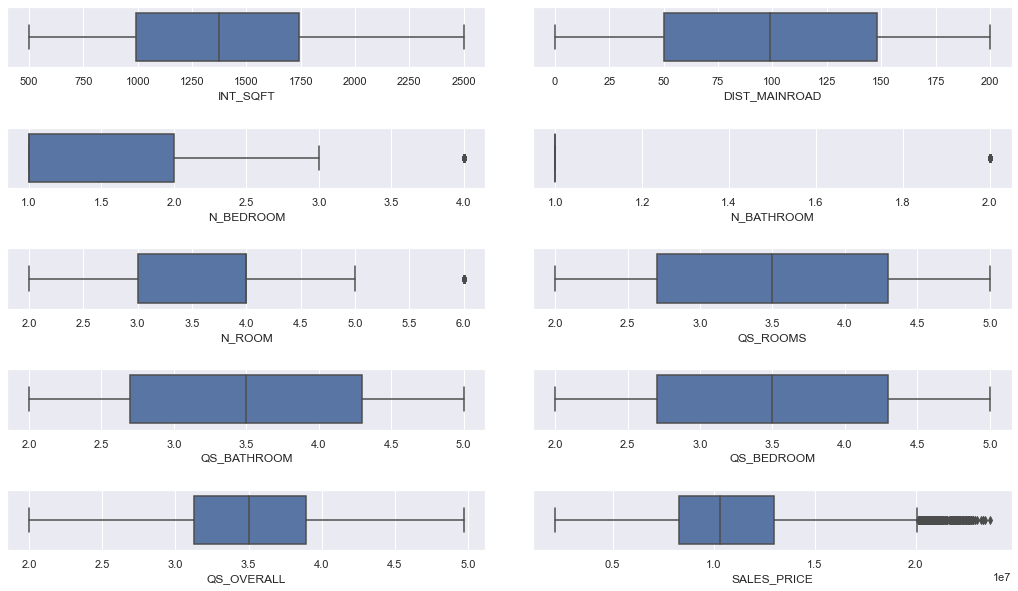

In [168]:
items_len = len(num_columns)
rows = int(np.ceil(items_len/2))
cols = 2 if items_len >= 2 else items_len
fig, axes = plt.subplots(rows, cols, figsize=(18, 10))
fig.subplots_adjust(wspace=0.1, hspace=1)

for i, cname in enumerate(num_columns):
    axis = axes[int(i//2), i % 2]
    sns.boxplot(x=df[cname], ax=axis)

> DISTIRBUTION OVERVIEW

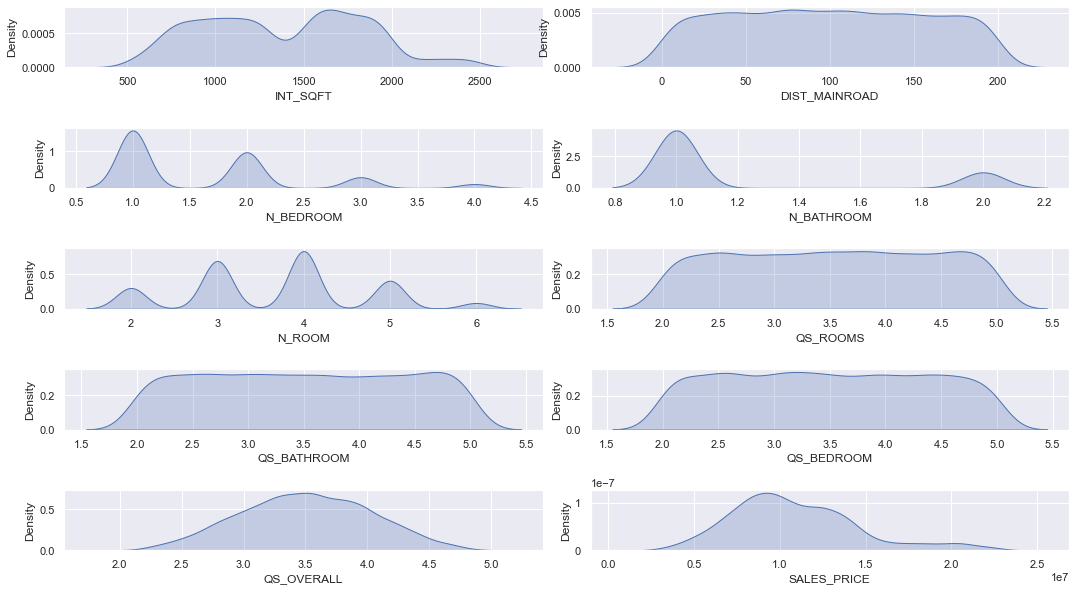

In [169]:
items_len = len(num_columns)
rows = int(np.ceil(items_len/2))
cols = 2 if items_len >= 2 else items_len
fig, axes = plt.subplots(rows, cols, figsize=(18, 10))
fig.subplots_adjust(wspace=0.1, hspace=1)

for i, cname in enumerate(num_columns):
    axis = axes[int(i//2), i % 2]
    sns.kdeplot(x=df[cname],shade = True, ax=axis)

There is no significant skew in any of the plots


Since the outliers in sales_price form a common_pattern we will not be removing them

correlation of numeric_Features

<AxesSubplot:>

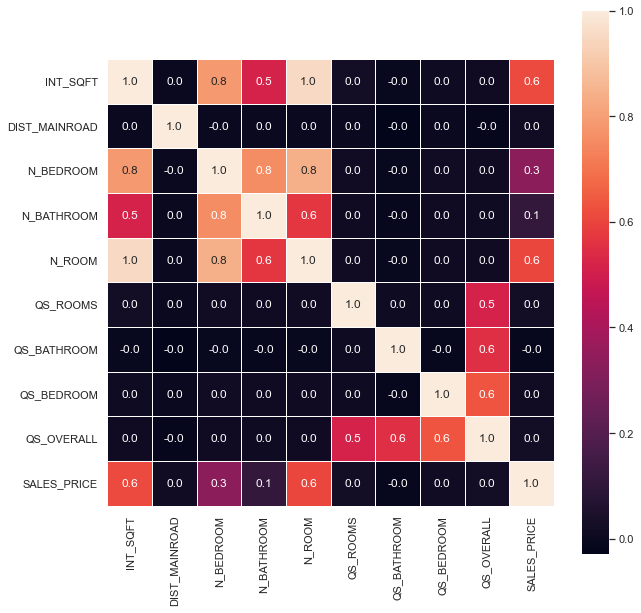

In [170]:
sns.set(rc = {'figure.figsize':(10,10)})
sns.heatmap(data = df.corr(),square = True,annot = True, fmt = '.1f',linewidth = 1)

Plotting scatter plots of numeric features vs target

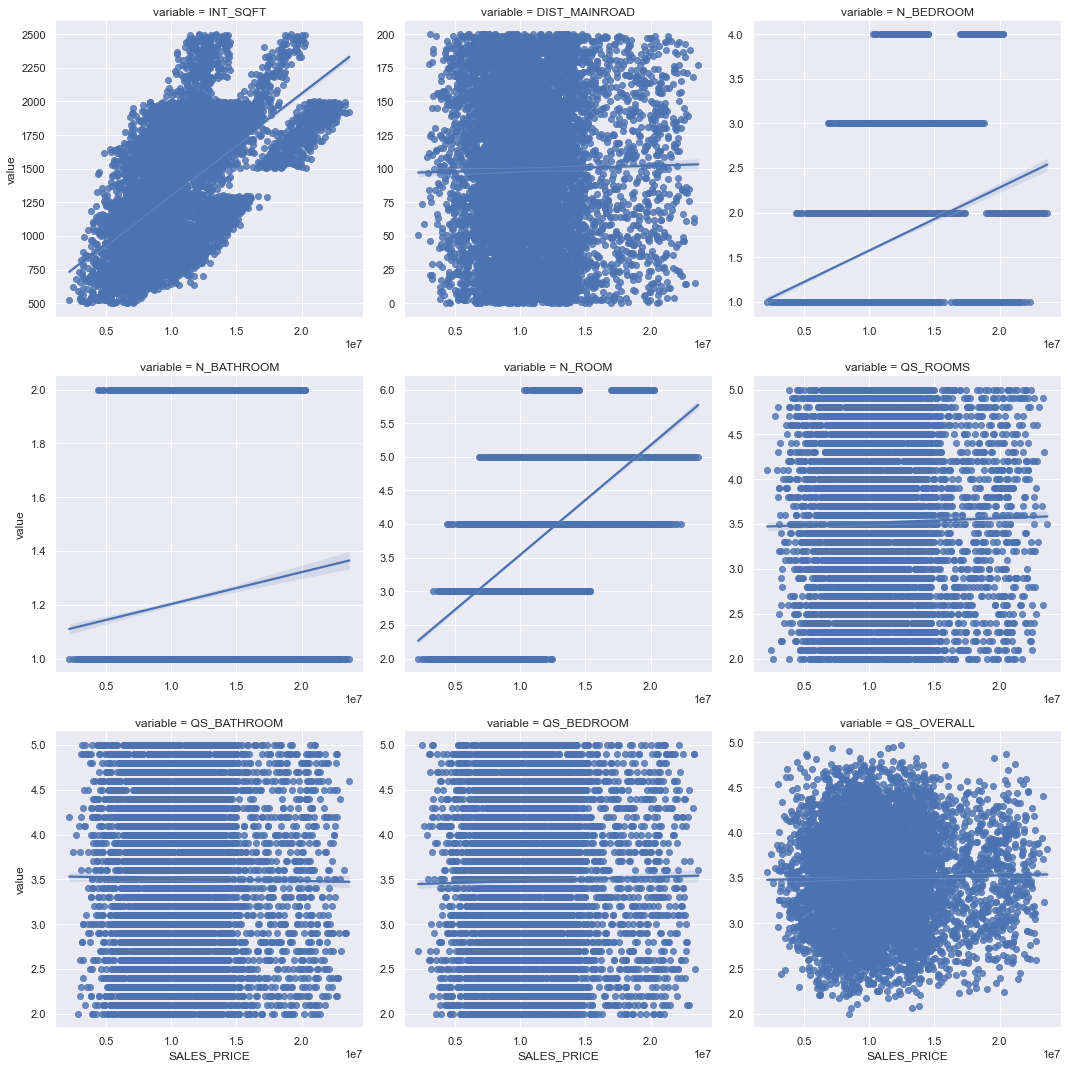

In [171]:
num_cnames = df.select_dtypes(exclude=['object', 'datetime']).columns
melt_df = df.melt(id_vars=["SALES_PRICE"], value_vars=num_cnames)
sns.lmplot(x="SALES_PRICE", y="value", data=melt_df, col="variable",
           col_wrap=3, facet_kws={"sharex": False, "sharey": False}, )

### Since the QS and DIST_MAINROAD columns correlation < 0.01 to target and doesn't show any indication of improvement by transformation we will remove those columns

In [172]:
to_drop = ["QS_ROOMS", "QS_BATHROOM",
           "QS_BEDROOM", "QS_OVERALL", "DIST_MAINROAD"]
df.drop(to_drop, axis=1, inplace=True)

Bar plots for categorical features

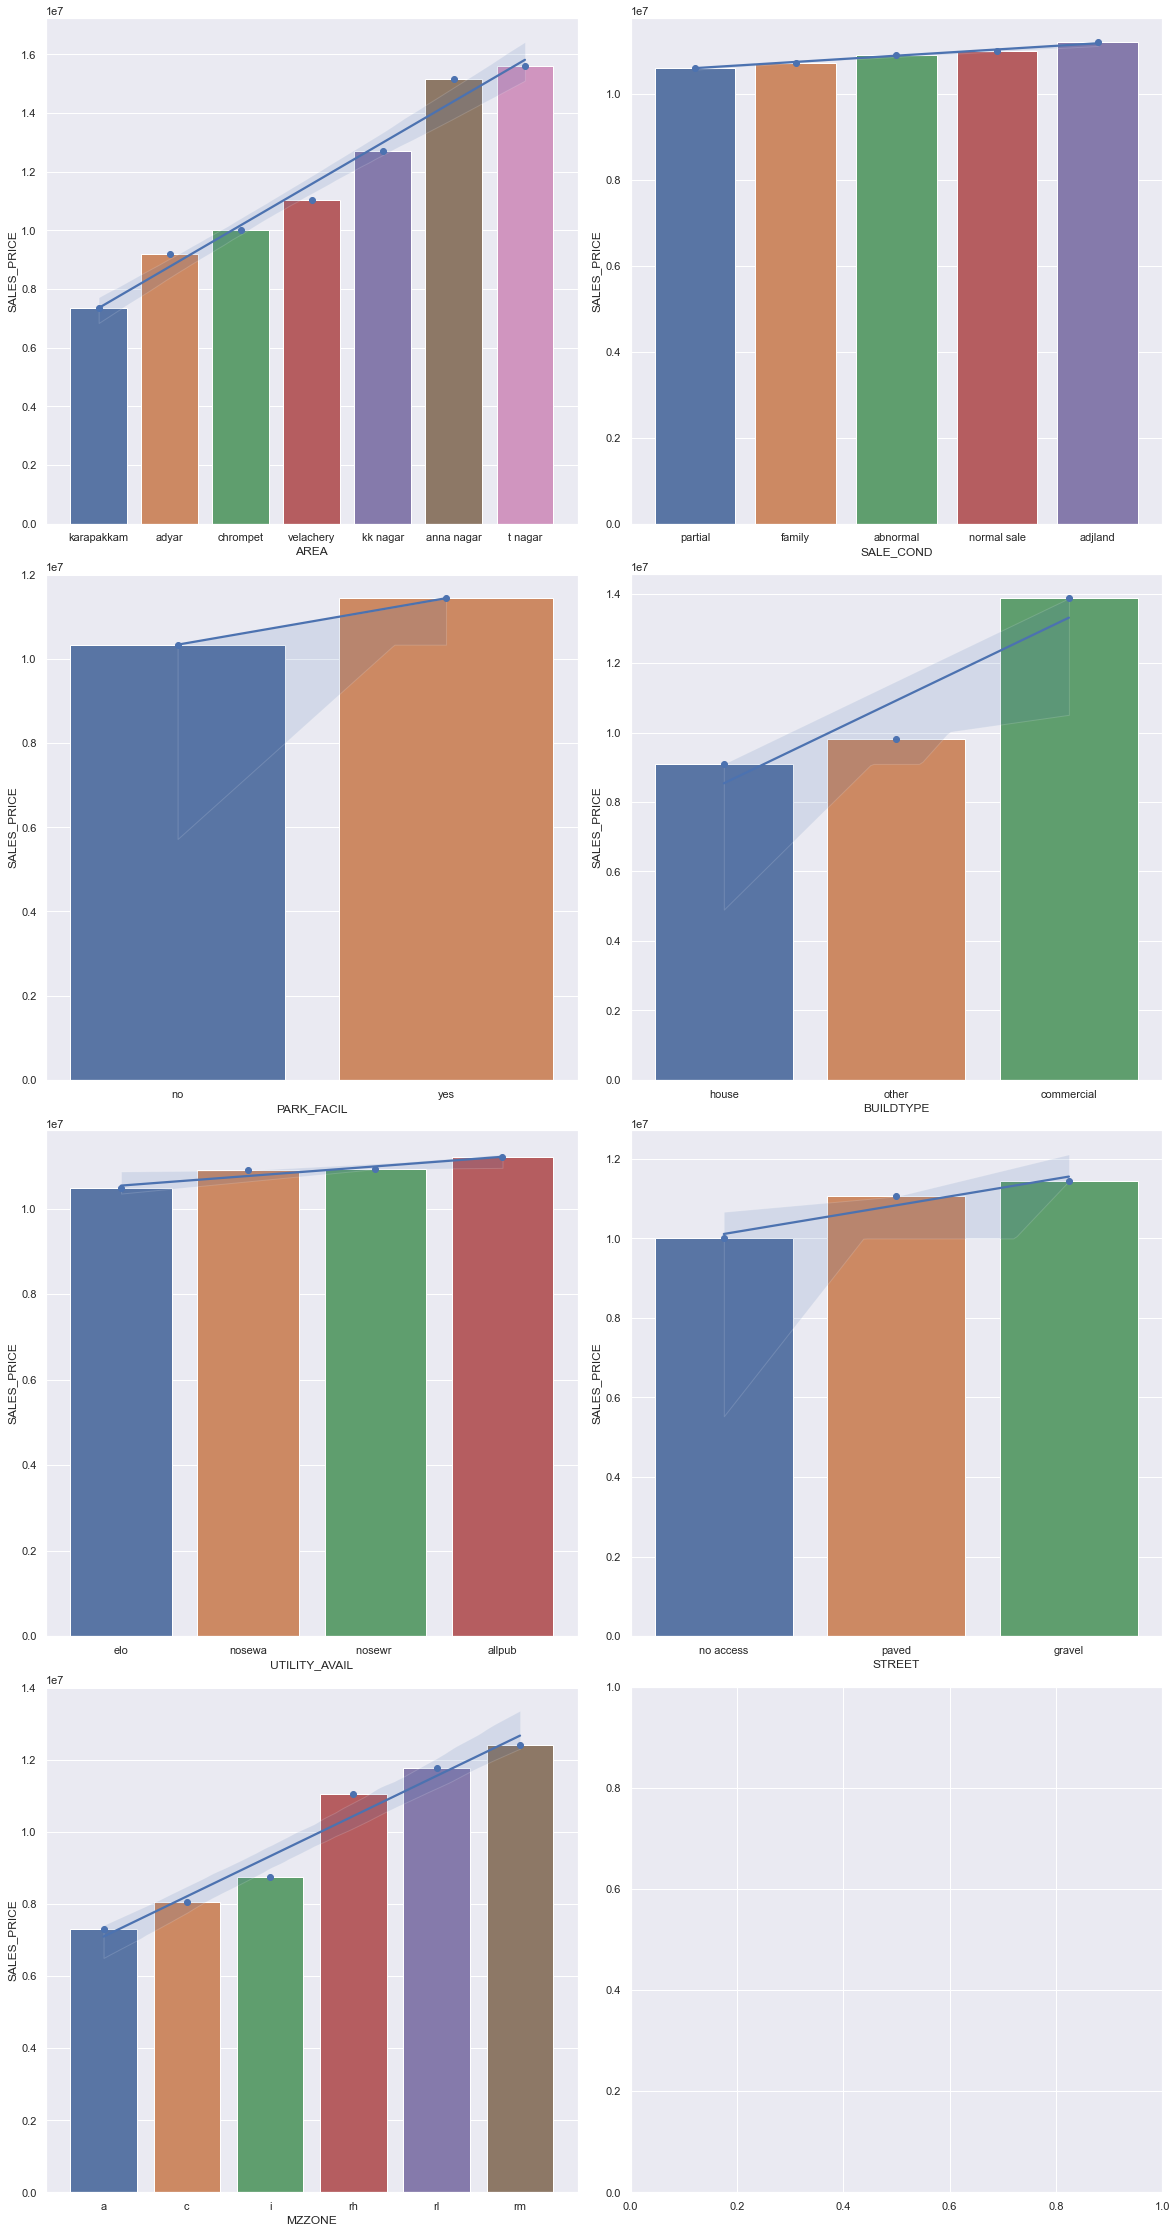

In [173]:
cnames = df.select_dtypes(include=['object']).columns

items_len = len(cnames)
rows = int(np.ceil(items_len/2))
cols = 2 if items_len >= 2 else items_len
fig, axes = plt.subplots(rows, cols, figsize=(20, 40))
fig.subplots_adjust(wspace=0.1, hspace=0.1)

for i, cname in enumerate(cnames):
    axis = axes[int(i//2), i % 2]
    data = df[["SALES_PRICE", cname]].groupby([cname])\
        .mean().sort_values("SALES_PRICE")
    sns.barplot(data=data, x=data.index, y=data["SALES_PRICE"], ax=axis, )
    sns.regplot(x=list(range(data.shape[0])), y=data["SALES_PRICE"], ax=axis, scatter_kws={
                "zorder": 10, "alpha": 1}, ci=90)

All the above features have a good linear regression fit except for build type ,

So let us try to transform to an order 2 regression fit and and see if it improves.

In [174]:

data = df[["SALES_PRICE", "BUILDTYPE"]].groupby(["BUILDTYPE"]).mean().sort_values("SALES_PRICE")

In [175]:
def transform(x): return np.round(np.exp(x),).astype("int16")


In [176]:
data["LABEL"] = list(map(transform, range(data.shape[0])))
data

SALES_PRICE  LABEL
BUILDTYPE                      
house       9.098151e+06      1
other       9.805210e+06      3
commercial  1.386984e+07      7

<AxesSubplot:xlabel='LABEL', ylabel='SALES_PRICE'>

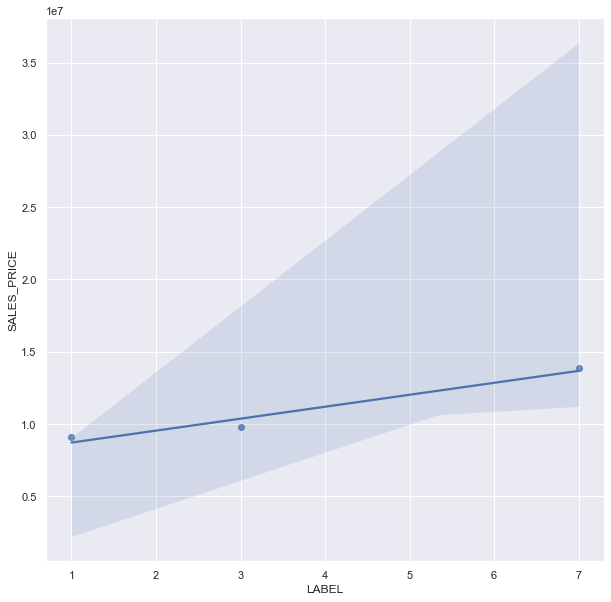

In [177]:
sns.regplot(x=data["LABEL"], y=data["SALES_PRICE"])


As we can see our transformation has created a good linear fit. So we will use this for the label encoding

Let us look at the distribution of each categorical data across the INT_SQFT and SALES_PRICE for better understanding of our categorical features

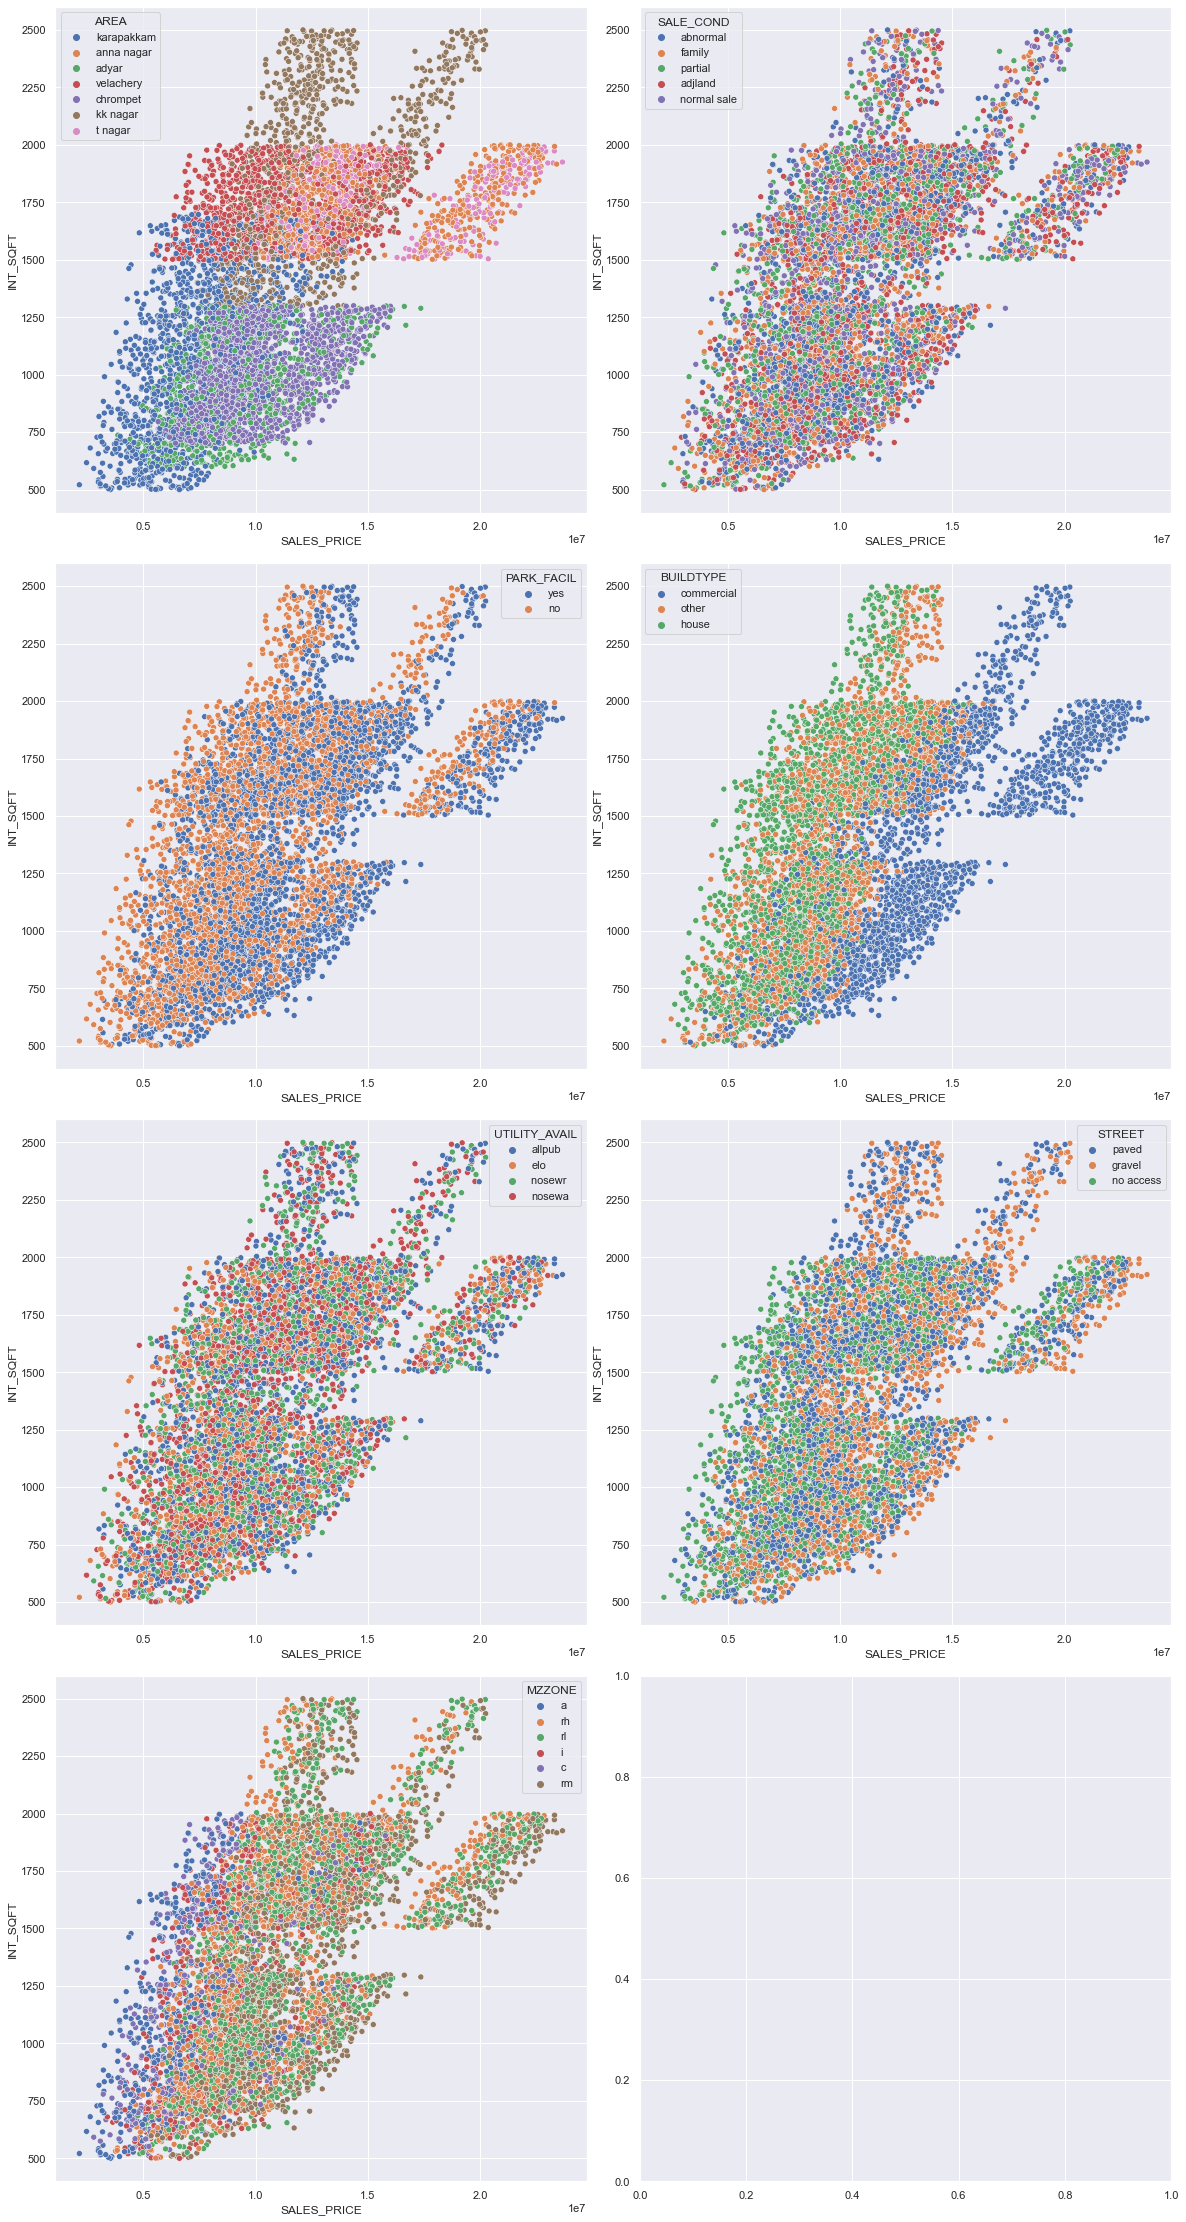

In [178]:
cnames = df.select_dtypes(include=['object']).columns
items_len = len(cnames)
rows = int(np.ceil(items_len/2))
cols = 2 if items_len >= 2 else items_len
fig, axes = plt.subplots(rows, cols, figsize=(20, 40))
fig.subplots_adjust(wspace=0.1, hspace=0.1)

for i, cname in enumerate(cnames):
    axis = axes[int(i//2), i % 2]
    sns.scatterplot(x="SALES_PRICE", y="INT_SQFT",
                    hue=cname, data=df, ax=axis)

All of the categorical features seem to have at the least minor variance information



Let us see if we can create new features that can have linear corelation with SALES_PRICE from the information we got from pair plot


There is one more feature we can add from knowing the built and sale date
proposed new features:

1. AVG_ROOM_SIZE
2. AGE

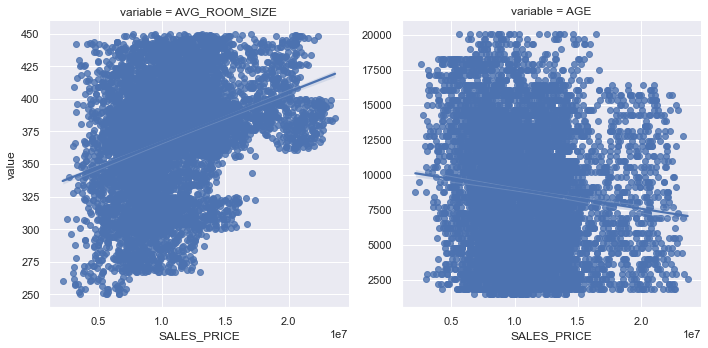

In [179]:
temp_df = df[["SALES_PRICE"]].copy(deep=True)
temp_df["AVG_ROOM_SIZE"] = (df["INT_SQFT"]/df["N_ROOM"]).round(0)
temp_df["AGE"] = (df["DATE_SALE"]-df["DATE_BUILD"]).dt.days
cnames = temp_df.drop("SALES_PRICE", axis=1).columns
melt_df = temp_df.melt(id_vars=["SALES_PRICE"], value_vars=cnames)
sns.lmplot(x="SALES_PRICE", y="value", data=melt_df, col="variable",
           col_wrap=2, facet_kws={"sharex": False, "sharey": False}, )

<AxesSubplot:>

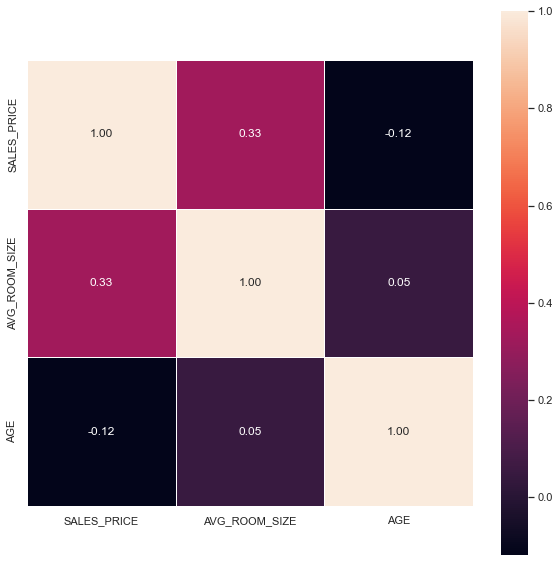

In [180]:
sns.heatmap(data=temp_df.corr(), square=True,
            annot=True, fmt='.2f', linewidths=1)


In [181]:
df = df.join(temp_df[["AVG_ROOM_SIZE", "AGE"]])


Since our new feature AVG_ROOM_SIZE is highly correlated INT_SQFT (because it was created from INT_SQFT) and the scatter plot shows symptoms of clusters we will run K-means on the AVG_ROOM_SIZE,INT_SQFT features and and replace the cluster ids in place of this column

In [182]:
from sklearn.cluster import KMeans


In [183]:
from sklearn.preprocessing import StandardScaler

#importing the required function
scalar = StandardScaler()
temp_df = df[['AVG_ROOM_SIZE','INT_SQFT']]
scaled_df = pd.DataFrame(scalar.fit_transform(temp_df),columns = temp_df.columns.to_list())
scaled_df.head()

AVG_ROOM_SIZE  INT_SQFT
0      -0.808796 -0.826573
1       0.607499  1.320099
2      -1.539787 -1.034245
3       0.013568  1.033731
4       0.881620 -0.341276

<AxesSubplot:>

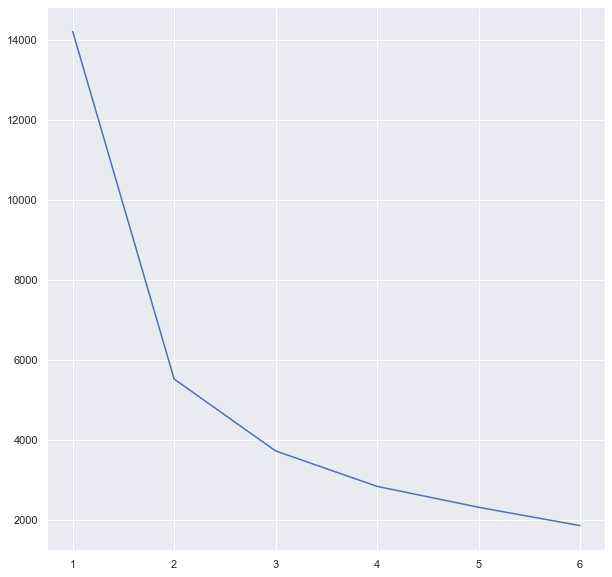

In [184]:
inertia = []
for i in range(1,7):
    cluster_model = KMeans(i)
    cluster_model.fit_predict(scaled_df.to_numpy())
    inertia.append(cluster_model.inertia_)
sns.lineplot(y = inertia,x = range(1,len(inertia)+1))

knee:  2


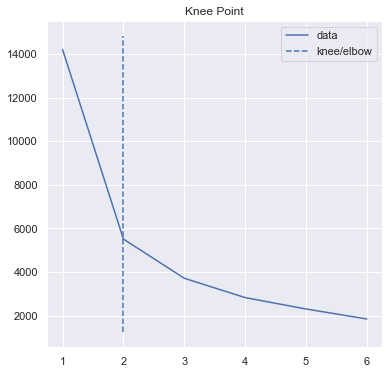

In [185]:
import kneed
kneedle = kneed.KneeLocator(list(range(1,len(inertia)+1)),inertia,curve = "convex",direction = 'decreasing')
knee_point = kneedle.knee
print('knee: ',knee_point)
kneedle.plot_knee()

* We can understand the knee is at 2 from the plot hence we will select 2 as hyperparam

<AxesSubplot:ylabel='SALES_PRICE'>

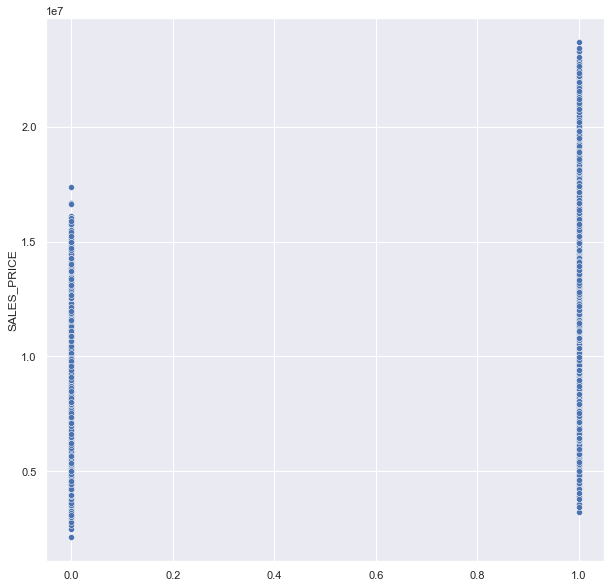

In [186]:
cluster_model = KMeans(n_clusters = 2)
label_column = cluster_model.fit_predict(scaled_df)
sns.scatterplot(data = df,x = label_column, y = 'SALES_PRICE')

<AxesSubplot:xlabel='AVG_ROOM_SIZE', ylabel='SALES_PRICE'>

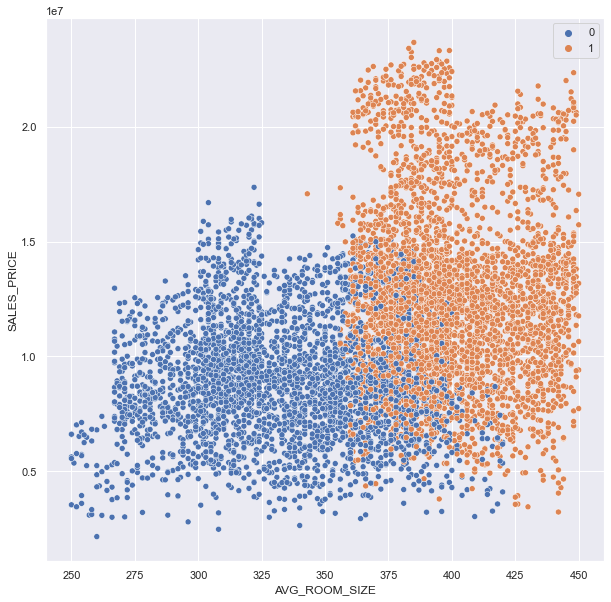

In [187]:
sns.scatterplot(data = df,x = 'AVG_ROOM_SIZE',y = 'SALES_PRICE',hue = label_column)

In [188]:
data = pd.DataFrame({'SALES_PRICE':df.SALES_PRICE,'LABEL':label_column})
data = data.groupby(['LABEL']).mean().sort_values('SALES_PRICE')
data

SALES_PRICE
LABEL              
0      8.922819e+06
1      1.254589e+07

<AxesSubplot:ylabel='SALES_PRICE'>

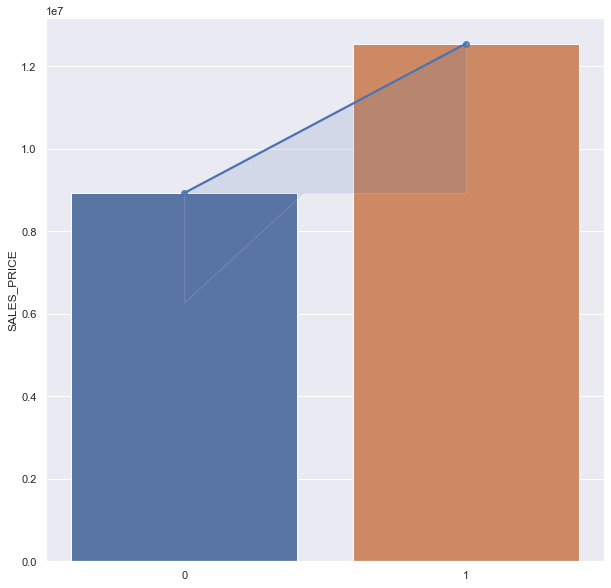

In [189]:
sns.barplot(x = list(range(2)),y = data['SALES_PRICE'])
sns.regplot(x = list(range(2)),y = data['SALES_PRICE'])

This plot shows us the grouping of spacious houses vs congested houses

And we get a good liner fit for the average room size vs target


Lets look if there is some trend connected with built/sale date


<AxesSubplot:xlabel='DATE_BUILD', ylabel='MA'>

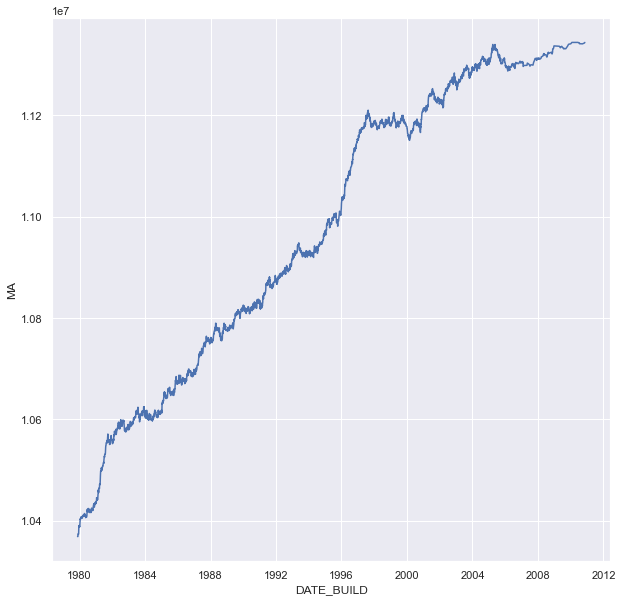

In [190]:
temp_df = df[['DATE_BUILD','SALES_PRICE']]
temp_df = temp_df.groupby('DATE_BUILD').mean()
temp_df['MA'] = temp_df['SALES_PRICE'].rolling(2000).mean().dropna()
sns.lineplot(y = temp_df['MA'], x = temp_df.index)

<AxesSubplot:xlabel='DATE_SALE', ylabel='MA'>

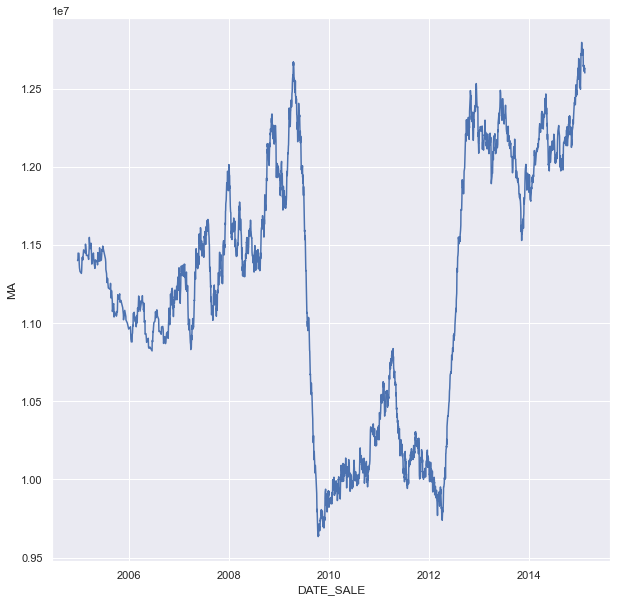

In [191]:
temp_df = df[["DATE_SALE", "SALES_PRICE"]]
temp_df = temp_df.groupby("DATE_SALE").mean()
temp_df["MA"] = temp_df["SALES_PRICE"].rolling(100).mean().dropna()
sns.lineplot(y=temp_df["MA"], x=temp_df.index)

From the above plots we can see there are two trends in the price

* Contemporary houses are costlier
* Price also increases due to inflation

### We also seem to have a big outlier in trend from late 2008 to early 2012

After some google search we find that Developers faced funding shortages due to the stock market crash of 2008, and fleeing foreign investors. This has led to residential project delays, and cancellations.

The first trend can be learnt by converting the date built to number of days and then forming a regression line from the rolling average. We also can try to create a Principal component from the build date and age feature.
The second trend however we will not know since the date of sale is unknown util the sale has been done.


We can add another colum with binary variable that indicates there was a crash in housing market during this period.

(array([14245., 14304., 14365., 14426., 14488., 14549., 14610.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

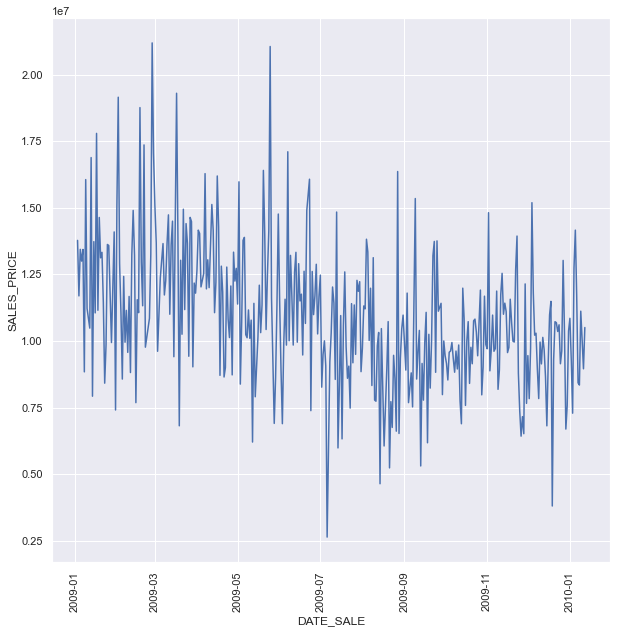

In [192]:
temp_df = df[['DATE_SALE','SALES_PRICE']]
temp_df  = temp_df.groupby('DATE_SALE').mean()
temp_df1 = temp_df['01-02-2009':'01-12-2010']
sns.lineplot(y = temp_df1['SALES_PRICE'],x = temp_df1.index)
plt.xticks(rotation = 90)

(array([15340., 15400., 15461., 15522., 15584., 15645., 15706.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

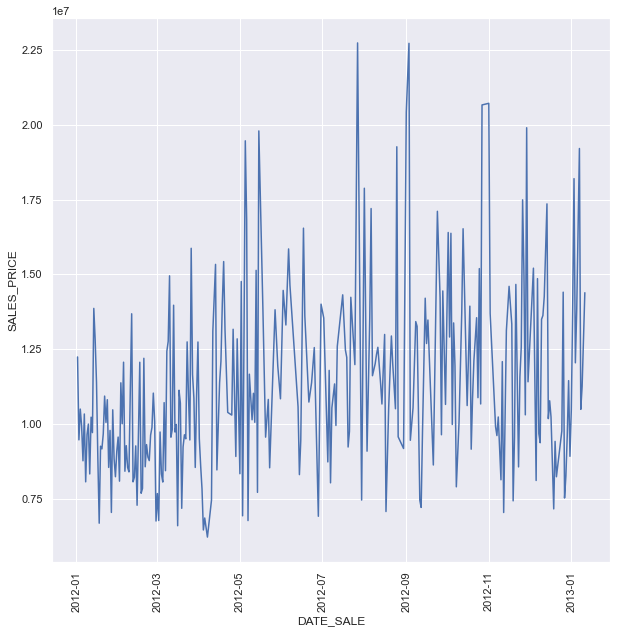

In [193]:
temp_df1 = temp_df['01-02-2012':'01-12-2013']
sns.lineplot(y = temp_df1['SALES_PRICE'], x = temp_df1.index)
plt.xticks(rotation = 90)


#### From observing above plots we can add our variable to match the period from 07/2009 to 03/2012

In [194]:
df['MARKET_CRASH'] = pd.Series(np.zeros(df.shape[0],dtype = np.int8))
mask = (df['DATE_SALE'] >= '01-07-2009') & (df['DATE_SALE'] <= '01-03-2012')
df.loc[mask,'MARKET_CRASH'] = 1
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7103 entries, 0 to 7102
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   AREA           7103 non-null   object        
 1   INT_SQFT       7103 non-null   int64         
 2   DATE_SALE      7103 non-null   datetime64[ns]
 3   N_BEDROOM      7103 non-null   int32         
 4   N_BATHROOM     7103 non-null   int32         
 5   N_ROOM         7103 non-null   int64         
 6   SALE_COND      7103 non-null   object        
 7   PARK_FACIL     7103 non-null   object        
 8   DATE_BUILD     7103 non-null   datetime64[ns]
 9   BUILDTYPE      7103 non-null   object        
 10  UTILITY_AVAIL  7103 non-null   object        
 11  STREET         7103 non-null   object        
 12  MZZONE         7103 non-null   object        
 13  SALES_PRICE    7103 non-null   int64         
 14  AVG_ROOM_SIZE  7103 non-null   float64       
 15  AGE            7103 n

SALES_PRICE
MARKET_CRASH              
1             1.030968e+07
0             1.155062e+07

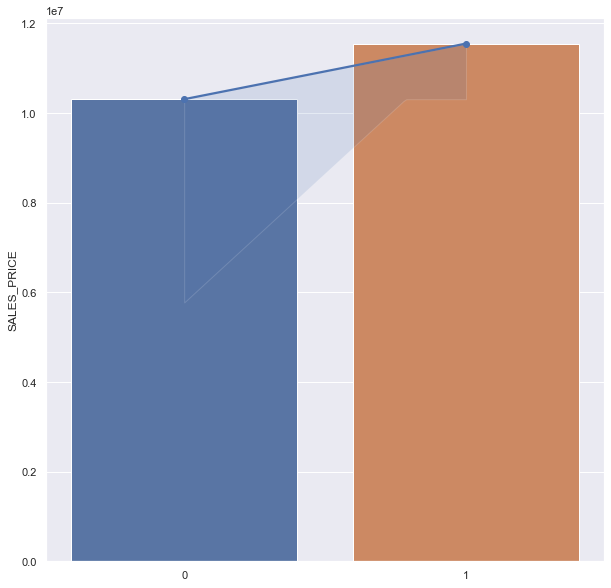

In [195]:
data = df.groupby("MARKET_CRASH")[
    ["SALES_PRICE"]].mean().sort_values("SALES_PRICE")
x = list(range(data.shape[0]))
sns.barplot(x=x, y="SALES_PRICE", data=data,)
sns.regplot(x=x, y="SALES_PRICE", data=data, scatter_kws={
    "zorder": 10, "alpha": 1}, ci=90)
data

<AxesSubplot:xlabel='SALES_PRICE', ylabel='INT_SQFT'>

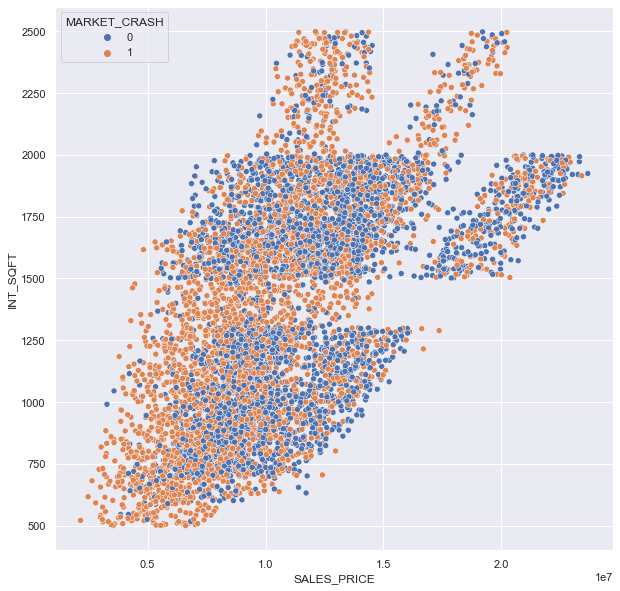

In [196]:
sns.scatterplot(x="SALES_PRICE", y="INT_SQFT",
                hue="MARKET_CRASH", data=df, )

In [197]:
to_drop = ["DATE_BUILD", "DATE_SALE"]
df.drop(to_drop, axis=1, inplace=True)

In [198]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7103 entries, 0 to 7102
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   AREA           7103 non-null   object 
 1   INT_SQFT       7103 non-null   int64  
 2   N_BEDROOM      7103 non-null   int32  
 3   N_BATHROOM     7103 non-null   int32  
 4   N_ROOM         7103 non-null   int64  
 5   SALE_COND      7103 non-null   object 
 6   PARK_FACIL     7103 non-null   object 
 7   BUILDTYPE      7103 non-null   object 
 8   UTILITY_AVAIL  7103 non-null   object 
 9   STREET         7103 non-null   object 
 10  MZZONE         7103 non-null   object 
 11  SALES_PRICE    7103 non-null   int64  
 12  AVG_ROOM_SIZE  7103 non-null   float64
 13  AGE            7103 non-null   int64  
 14  MARKET_CRASH   7103 non-null   int8   
dtypes: float64(1), int32(2), int64(4), int8(1), object(7)
memory usage: 728.5+ KB


### We have done our exploratory data analysis and cleaning
### Next we need to create a pipeline to scale, model and predict incoming data


### Split to feature and target

In [199]:
X,y = df.drop('SALES_PRICE',axis = 1),df['SALES_PRICE']
X.shape

(7103, 14)

#### Split to train and test


In [200]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split( X, y ,test_size = 0.33,random_state= 42)
X_train.shape,X_test.shape

((4759, 14), (2344, 14))

#### Encoding required features


In [214]:
cnames = df.select_dtypes(include = ['object']).columns

label_map = {}
for i, cname in enumerate(cnames):
    data = pd.DataFrame({'SALES_PRICE':Y_train,'cname' : X_train[cname]}).groupby("cname").mean().sort_values('SALES_PRICE')
    indices  = data.index.to_list()
    label_map[cname] = dict(zip(indices,range(len(indices))))

label_map

{'AREA': {'karapakkam': 0,
  'adyar': 1,
  'chrompet': 2,
  'velachery': 3,
  'kk nagar': 4,
  'anna nagar': 5,
  't nagar': 6},
 'SALE_COND': {'partial': 0,
  'family': 1,
  'abnormal': 2,
  'normal sale': 3,
  'adjland': 4},
 'PARK_FACIL': {'no': 0, 'yes': 1},
 'BUILDTYPE': {'house': 0, 'other': 1, 'commercial': 2},
 'UTILITY_AVAIL': {'elo': 0, 'nosewr ': 1, 'nosewa': 2, 'allpub': 3},
 'STREET': {'no access': 0, 'paved': 1, 'gravel': 2},
 'MZZONE': {'a': 0, 'c': 1, 'i': 2, 'rh': 3, 'rl': 4, 'rm': 5}}

We have noted that BUILDTYPE had an exponential transformation applied to it

In [215]:
values = list(label_map['BUILDTYPE'].values())
keys = list(label_map['BUILDTYPE'].keys())

label_map['BUILDTYPE'] = dict(zip(keys,map(transform,values)))

#### Label encoding

In [216]:
X_train.replace(label_map,inplace = True)
X_test.replace(label_map,inplace = True)
X_train.isnull().sum(),X_test.isnull().sum()

(AREA             0
 INT_SQFT         0
 N_BEDROOM        0
 N_BATHROOM       0
 N_ROOM           0
 SALE_COND        0
 PARK_FACIL       0
 BUILDTYPE        0
 UTILITY_AVAIL    0
 STREET           0
 MZZONE           0
 AVG_ROOM_SIZE    0
 AGE              0
 MARKET_CRASH     0
 dtype: int64,
 AREA             0
 INT_SQFT         0
 N_BEDROOM        0
 N_BATHROOM       0
 N_ROOM           0
 SALE_COND        0
 PARK_FACIL       0
 BUILDTYPE        0
 UTILITY_AVAIL    0
 STREET           0
 MZZONE           0
 AVG_ROOM_SIZE    0
 AGE              0
 MARKET_CRASH     0
 dtype: int64)

**Scaling**

In [217]:
scaler = StandardScaler()
scaler.fit_transform(X_train)
scaler.transform(X_test)

array([[-1.37557642,  0.4895914 ,  0.44691559, ...,  0.72532246,
        -0.58893867,  0.93981955],
       [-0.29496101, -0.52320032, -0.79396614, ...,  0.22046057,
        -0.83225486, -1.06403405],
       [ 1.32596212,  0.78144965, -0.79396614, ...,  1.48261529,
        -1.31888723,  0.93981955],
       ...,
       [-0.29496101, -1.43362384, -0.79396614, ..., -0.19260825,
         1.11427463, -1.06403405],
       [-0.29496101, -1.08513636, -0.79396614, ..., -1.75309045,
         1.03316923, -1.06403405],
       [ 0.78565441,  0.97747386,  1.68779732, ..., -0.10081518,
        -0.26451709,  0.93981955]])

**Clustering AVG_ROOM_SIZE**

In [218]:
cluster_model = KMeans(n_clusters = 2)
scaler_df = X_train[['AVG_ROOM_SIZE','INT_SQFT']]
cluster_model.fit(scaler_df.to_numpy())
cluster_label = cluster_model.predict(scaler_df.to_numpy())


X_train['AVG_ROOM_SIZE'] = pd.Series(cluster_label,index = X_train.index)


scaler_df = X_test[['AVG_ROOM_SIZE','INT_SQFT']]
cluster_label = cluster_model.predict(scaler_df.to_numpy())

X_test['AVG_ROOM_SIZE'] = pd.Series(cluster_label,index = X_test.index)


**Feature Importance**



In [220]:
def plot_feature_importance(model):
    importances = model.feature_importances_
    feature_names = model.feature_names_in_
    def sort_key(x): return importances[list(feature_names).index(x)]
    feature_names = sorted(feature_names, key=sort_key, reverse=True)
    importances = sorted(importances, reverse=True)

    sns.set(rc={'figure.figsize': (10, 5)})
    ax = sns.barplot(x=feature_names, y=importances, )
    patches = ax.patches
    for i in range(len(patches)):
        x = patches[i].get_x() + patches[i].get_width()/2
        y = patches[i].get_height()+0.01
        ax.annotate('{:.1f}%'.format(importances[i]*100), (x, y), ha='center')
    plt.xticks(rotation=90)
    sns.pointplot(x=feature_names, y=np.cumsum(importances), )

**Modeling**

In [221]:
from sklearn.linear_model import LinearRegression

regression_model = LinearRegression()
regression_model.fit(X_train,Y_train)
y_pred = regression_model.predict(X_test)

**Evaluation**

In [223]:
from sklearn.metrics import r2_score

r2_score(Y_test,y_pred)

0.9163630204002899

In [224]:
coefs = regression_model.coef_
feature_importances_ = abs(coefs)/abs(coefs).sum()

regression_model.feature_importances_ = feature_importances_
dict(zip(regression_model.feature_names_in_, regression_model.feature_importances_))

{'AREA': 0.0735964753522016,
 'INT_SQFT': 0.0002990082401322425,
 'N_BEDROOM': 0.19255105223863458,
 'N_BATHROOM': 0.04960704150312609,
 'N_ROOM': 0.18253634942911628,
 'SALE_COND': 0.018401933737771256,
 'PARK_FACIL': 0.12318620588014402,
 'BUILDTYPE': 0.09677364893607128,
 'UTILITY_AVAIL': 0.004018274109474027,
 'STREET': 0.0590697070660285,
 'MZZONE': 0.06867823602693364,
 'AVG_ROOM_SIZE': 0.0978116585069783,
 'AGE': 5.3292332041448396e-06,
 'MARKET_CRASH': 0.033465079740184055}

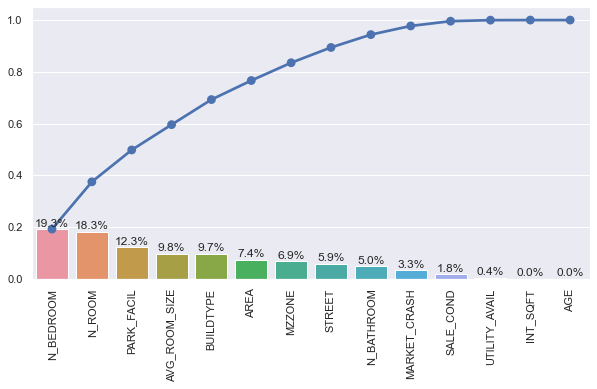

In [225]:
plot_feature_importance(regression_model)


#### Now that our data is ready and our modeling and evaluation are working we can do a n fold cross validation to get the best model

In [229]:
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score

models = [GradientBoostingRegressor, RandomForestRegressor,
          DecisionTreeRegressor, LinearRegression,
          KNeighborsRegressor, SVR]


def model_cv_score(model_class):
    model = model_class()
    return cross_val_score(model, X_train, Y_train, cv=5, scoring="r2", n_jobs=-1)

In [230]:
scores = []
for model in models:
    print(model)
    score = model_cv_score(model)
    scores.append(score.mean())
scores

<class 'sklearn.ensemble._gb.GradientBoostingRegressor'>
<class 'sklearn.ensemble._forest.RandomForestRegressor'>
<class 'sklearn.tree._classes.DecisionTreeRegressor'>
<class 'sklearn.linear_model._base.LinearRegression'>
<class 'sklearn.neighbors._regression.KNeighborsRegressor'>
<class 'sklearn.svm._classes.SVR'>


[0.9904436427611415,
 0.9872619808870994,
 0.9676973371489991,
 0.9143406358909043,
 0.34077321757923346,
 -0.02513505538997176]

**Select best model**

In [231]:
index = scores.index(max(scores))
models[index]

sklearn.ensemble._gb.GradientBoostingRegressor

#### Now that we know that the GradientBoostingRegressor is the best we will use grid search to tune the hyperparameter to get get the best fit

In [234]:
from sklearn.model_selection import GridSearchCV

parameters = {'learning_rate': [0.1, 0.05, ],
              'n_estimators': [50, 100, 200],
              'max_depth': [4, 6, 8, 10]
              }
model = GradientBoostingRegressor()
grid_GBR = GridSearchCV(estimator=model,
                        param_grid=parameters, cv=5, n_jobs=-1)
grid_GBR.fit(X_train, Y_train)


GridSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.05],
                         'max_depth': [4, 6, 8, 10],
                         'n_estimators': [50, 100, 200]})

In [235]:
result_df = pd.DataFrame(grid_GBR.cv_results_)
cols = ["param_learning_rate", "param_n_estimators",
        "param_max_depth", "mean_test_score"]
result_df[cols].sort_values("mean_test_score", ascending=False).head()

param_learning_rate param_n_estimators param_max_depth  mean_test_score
2                  0.1                200               4         0.997226
5                  0.1                200               6         0.996740
17                0.05                200               6         0.996114
4                  0.1                100               6         0.995872
1                  0.1                100               4         0.994522

**Lets try to improve more by changing our grid from above grid results**

In [237]:
parameters = {'learning_rate': [0.1, 0.2, 0.5],
              'n_estimators': [150, 200, 300],
              'max_depth': [4, 5, 3]
              }
model = GradientBoostingRegressor()
grid_GBR = GridSearchCV(estimator=model,
                        param_grid=parameters, cv=5, n_jobs=-1)
grid_GBR.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.2, 0.5],
                         'max_depth': [4, 5, 3],
                         'n_estimators': [150, 200, 300]})

In [238]:
result_df = pd.DataFrame(grid_GBR.cv_results_)
cols = ["param_learning_rate", "param_n_estimators",
        "param_max_depth", "mean_test_score"]
result_df[cols].sort_values("mean_test_score", ascending=False).head()

param_learning_rate param_n_estimators param_max_depth  mean_test_score
2                  0.1                300               4         0.997810
26                 0.5                300               3         0.997797
11                 0.2                300               4         0.997705
5                  0.1                300               5         0.997643
17                 0.2                300               3         0.997623

#### Since we don't see any significant improvement from our previous results we will stick with our previous best params


In [243]:
model = GradientBoostingRegressor(
    learning_rate=0.1, max_depth=4, n_estimators=200)
model.fit(X_train, Y_train)
y_pred = model.predict(X_test)
r2_score(Y_test, y_pred)

0.9974268158496618

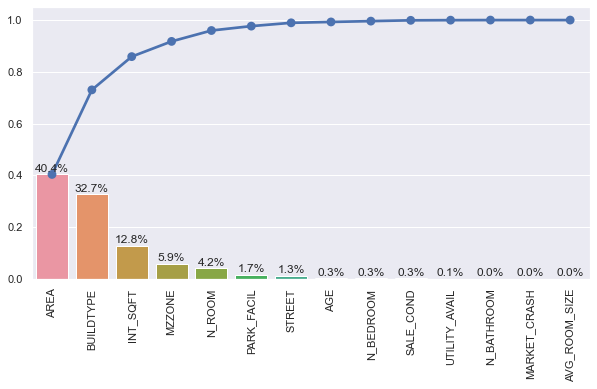

In [244]:
plot_feature_importance(model)

Class for predicting range instead of single value

In [245]:
class GradientBoostingRange():
    def __init__(self, l_quantile=0.1, u_quantile=0.9):
        kv_hp = {"learning_rate": 0.1, "max_depth": 4, "n_estimators": 200}
        self.lower_model = GradientBoostingRegressor(loss="quantile",
                                                     alpha=l_quantile, **kv_hp)
        self.mid_model = GradientBoostingRegressor(**kv_hp)
        self.upper_model = GradientBoostingRegressor(loss="quantile",
                                                     alpha=u_quantile, **kv_hp)

    def fit(self, X_train, y_train):
        self.lower_model.fit(X_train, y_train)
        self.mid_model.fit(X_train, y_train)
        self.upper_model.fit(X_train, y_train)
        models = [self.lower_model, self.mid_model, self.upper_model]
        scores = [r2_score(y_train, model.predict(X_train))for model in models]
        print(scores, "\nModel Ready!")

    def predict(self, X_predict):
        predictions = {}
        predictions['lower'] = self.lower_model.predict(X_predict)
        predictions['mid'] = self.mid_model.predict(X_predict)
        predictions['upper'] = self.upper_model.predict(X_predict)
        return pd.DataFrame(predictions)

In [247]:
model = GradientBoostingRange()
model.fit(X_train, Y_train)

[0.9820069294297212, 0.998594064476782, 0.9823492504838317] 
Model Ready!


In [248]:
model.predict(X_test).head()

lower           mid         upper
0  7.340787e+06  7.676439e+06  8.089286e+06
1  1.085732e+07  1.188471e+07  1.201973e+07
2  1.218609e+07  1.219758e+07  1.263478e+07
3  7.632157e+06  8.101289e+06  8.099279e+06
4  1.359845e+07  1.405243e+07  1.421305e+07